In [102]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [103]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [104]:
# Display sample data columns
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [105]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [106]:
# Explore DataFrame shape
market_data_df.shape

(41, 7)

### Prepare the Data

In [107]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_scaled = StandardScaler().fit_transform(market_data_df)

# Display the arrays
market_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [108]:
# Create a DataFrame with the scaled data
market_scaled_df = pd.DataFrame(market_scaled, columns=market_data_df.columns)

# Copy the crypto names or coin_ids from the original data
market_scaled_df['coin_id'] = market_data_df.index

# Set the coin_id column as index
market_scaled_df = market_scaled_df.set_index('coin_id')

# Display sample data
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [109]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# k = [x for x in range(1,11)]
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i,random_state=1)
    k_model.fit(market_scaled_df)
    inertia.append(k_model.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

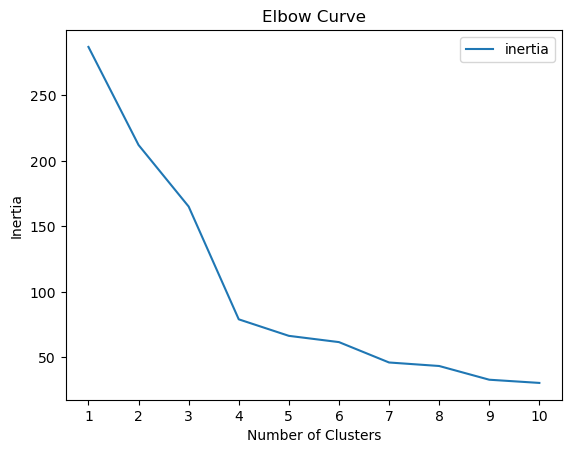

In [110]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(x='k',
                        y='inertia',
                        title='Elbow Curve',
                        xlabel='Number of Clusters',
                        ylabel='Inertia',
                        xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** In the Elbow Curve chart above, the x-axis respresents the number of clusters and the y-axis represents the inertia. The point where the curve bends or "elbow" is k=4, which represents the point where the decrease in inertia lessens. This is interpreted as the optimal k-value.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [111]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=1)

In [112]:
# Fit the K-Means model using the scaled data
k_model.fit(market_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [113]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = k_model.predict(market_scaled_df)
# View the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [114]:
# Create a copy of the DataFrame
market_predictions_df = market_scaled_df.copy()

In [115]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df['crypto_cluster'] = k_4

# Display sample data
market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'KMeans Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

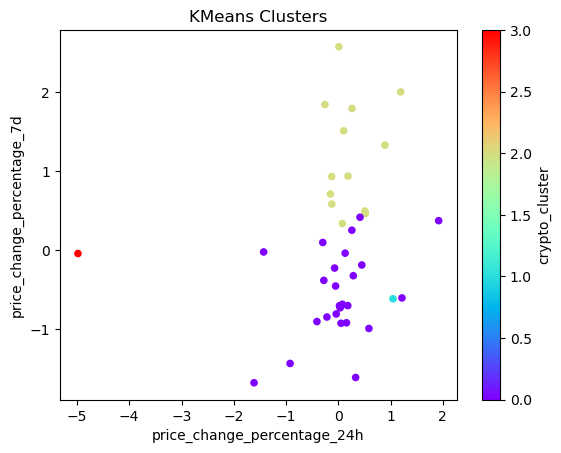

In [116]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_predictions_df.plot.scatter(
        x='price_change_percentage_24h',
        y='price_change_percentage_7d',
        c='crypto_cluster',
        title='KMeans Clusters',
        colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [117]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [118]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca = pca.fit_transform(market_scaled_df)

# View the first five rows of the ~~DataFrame~~ array of list data. 
market_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [119]:
pca.explained_variance_

array([2.6689967 , 2.48978331, 1.26307212])

In [120]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [121]:
# Determine the total explained variance of the three principal components
import numpy as np
total_explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"The total explained variance of the three principal components is: {total_explained_variance:.2f}%")

The total explained variance of the three principal components is: 89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** In the context of PCA, variance represents the spread or dispersion of data points along principal component axis. Explained variance refers to the amount of variance or dispersion of data captured by each component. The first component captures the maximum possible variance, second captures the maximum remaining variance, the third captures the maximum remaining variance. Thus the total explained variance is the sum of 3 principal components equaling 89.5%

In [122]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
market_pca_df = pd.DataFrame(market_pca, columns=['PCA1','PCA2','PCA3'])

# Copy the crypto names or coin_ids from the original data
market_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_pca_df = market_pca_df.set_index('coin_id')

# Display sample data
market_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [123]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# k = [x for x in range(1,11)]
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=2)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870
5,6,27.618972
6,7,23.793714
7,8,17.823822
8,9,14.123195
9,10,11.116837


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

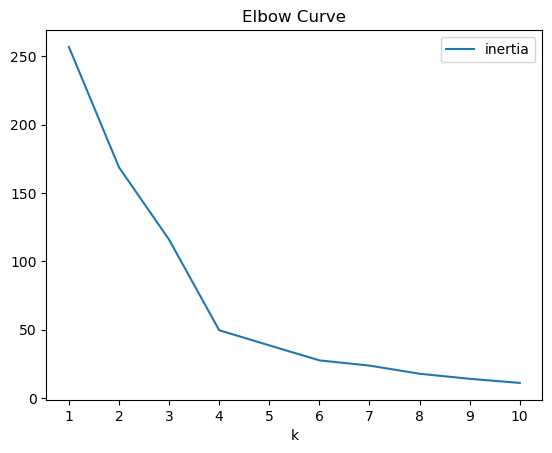

In [124]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Again, in the Elbow Curve chart above, the x-axis respresents the number of clusters and the y-axis represents the inertia. The point where the curve bends or "elbows" is k=4, which represents the point where the decrease in inertia lessens. This is interpreted as the optimal k-value. k=4 is the optimal k value


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Although the optimal k-value using PCA was also 4 the Elbow Method evaluation was not based on the original data, instead it was based on a DataFrame with lower dimensionality with less noise, ideally making the clusters more distinct. Whereas the original DataFrame included all dimensions of the original DataFrame, with more detailed structure and more noise.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [125]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=1)

In [126]:
# Fit the K-Means model using the PCA data
k_model.fit(market_pca_df)

KMeans(n_clusters=4, random_state=1)

In [127]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = k_model.predict(market_pca_df)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [128]:
# Create a copy of the DataFrame with the PCA data
market_pca_predictions_df = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_predictions_df['crypto_clusters'] = k_4

# Display sample data
market_pca_predictions_df.head()

,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [129]:
# Import hvPlot
import hvplot.pandas

In [130]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_predictions_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='crypto_clusters')


:Scatter   [PCA1]   (PCA2,crypto_clusters)

<Axes: xlabel='PCA1', ylabel='PCA2'>

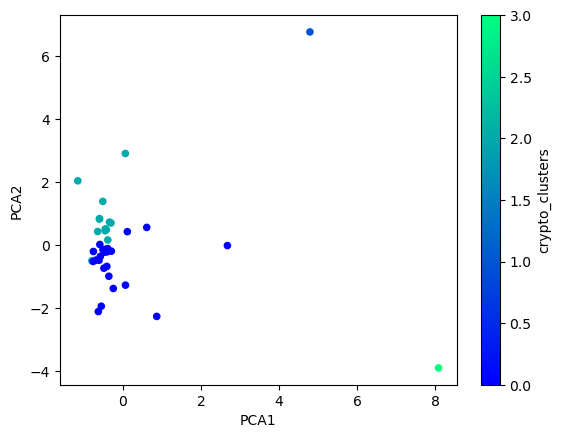

In [131]:
# Create a scatter plot using Plot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_predictions_df.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='crypto_clusters',
    colormap='winter')

### Determine the Weights of Each Feature on each Principal Component

In [132]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [133]:
# pca_component_weights.describe()

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**

  The goal of PCA is to find the axes (principal components) that maximize the variance of the data points, or in other words the direction in each features space that captures the maximum variance in the data. Hence high positive vector weights implies the feature has a strong influence on principal components in the positive direcction. A high negative vector weight implies the feature has a strong influence on the principal component in the negative direction.
  
  Regarding PCA1, the **"price_change_percentage_200d"** had the strongest positive influence with .594468 and **"price_change_percentage_24h"** had the strongest negative influence with -0.416728.

  Regarding PCA2, the **"price_change_percentage_30d"** had the strongest positive influence with .562182 and **"price_change_percentage_1y"** had the only negative influence with -0.150789.

  Regarding PCA3, the **"price_change_percentage_7d"** had the strongest positive influence with 0.787670 and **"price_change_percentage_60d"** had the strongest negative influence with -0.361377.  

